<a href="https://colab.research.google.com/github/aeroscissorz/Computer_Vision/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. RGB(219, 223, 222)
2. RGB(188, 197, 212)
3. RGB(106, 96, 112)
4. RGB(49, 168, 207)
5. RGB(97, 218, 243)
6. RGB(72, 147, 118)
7. RGB(163, 151, 151)
8. RGB(74, 106, 155)
9. RGB(76, 81, 66)
10. RGB(48, 33, 7)
11. RGB(140, 117, 139)
12. RGB(192, 189, 168)
13. RGB(117, 49, 100)
14. RGB(38, 31, 58)
15. RGB(140, 148, 206)


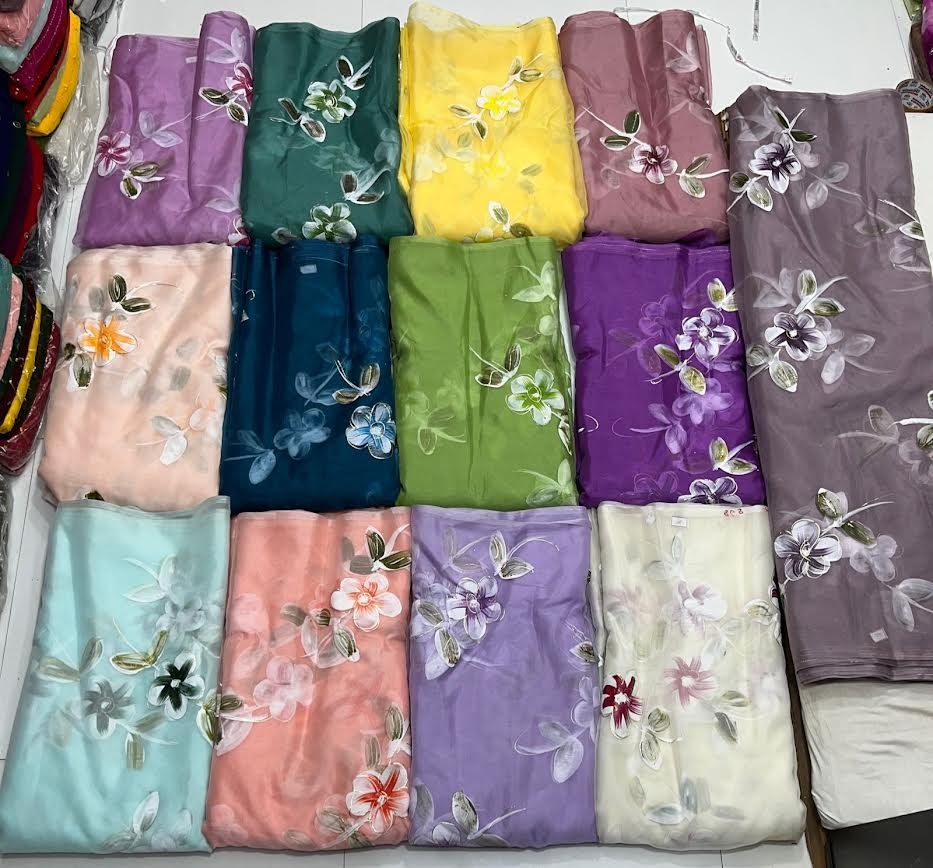

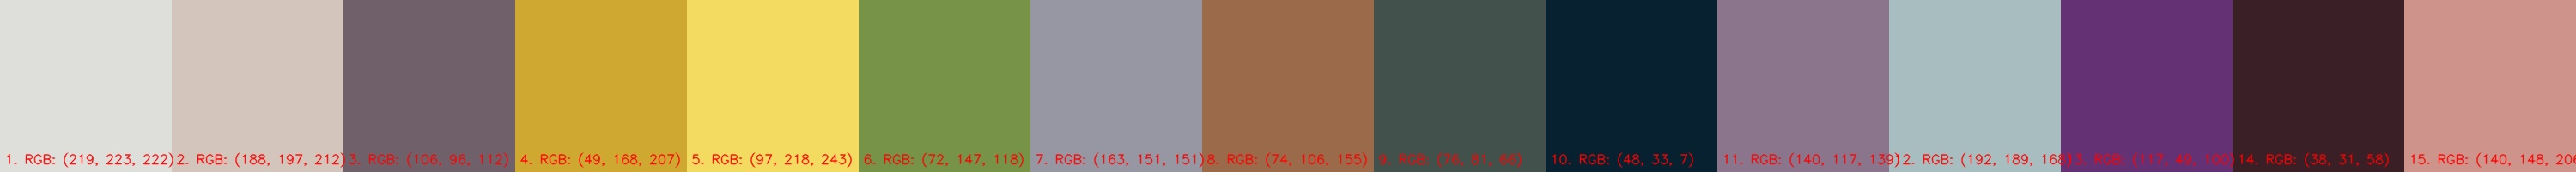

In [52]:
import cv2
import numpy as np
from IPython.display import Image, display

def create_bar(height, width, color):
    """
    Create a color bar with the specified dimensions and color.

    Parameters:
    - height: Height of the color bar.
    - width: Width of the color bar.
    - color: RGB color tuple.

    Returns:
    - bar: Color bar image.
    - rgb: RGB values of the color.
    """
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

# Load the image
img = cv2.imread('/content/Image/0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, _ = np.shape(img)

# Reshape the image for k-means clustering
data = np.reshape(img, (height * width, 3))
data = np.float32(data)

# Perform k-means clustering to find dominant colors
number_clusters = 15
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)

# Font for adding text to the color bars
font = cv2.FONT_HERSHEY_SIMPLEX

# Initialize lists to store color bars and RGB values
bars = []
rgb_values = []

# Create color bars and extract RGB values
for index, row in enumerate(centers):
    bar, rgb = create_bar(200, 200, row)
    bars.append(bar)
    rgb_values.append(rgb)

# Concatenate color bars horizontally
img_bar = np.hstack(bars)

# Add RGB values as text to the color bars
for index, row in enumerate(rgb_values):
    img_bar = cv2.putText(img_bar, f'{index + 1}. RGB: {row}', (5 + 200 * index, 200 - 10),
                          font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    print(f'{index + 1}. RGB{row}')

# Save the images to temporary files
cv2.imwrite('/content/original_image.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.imwrite('/content/dominant_colors.jpg', cv2.cvtColor(img_bar, cv2.COLOR_RGB2BGR))

# Display the original image
display(Image(filename='/content/original_image.jpg'))

# Display the dominant colors image
display(Image(filename='/content/dominant_colors.jpg'))


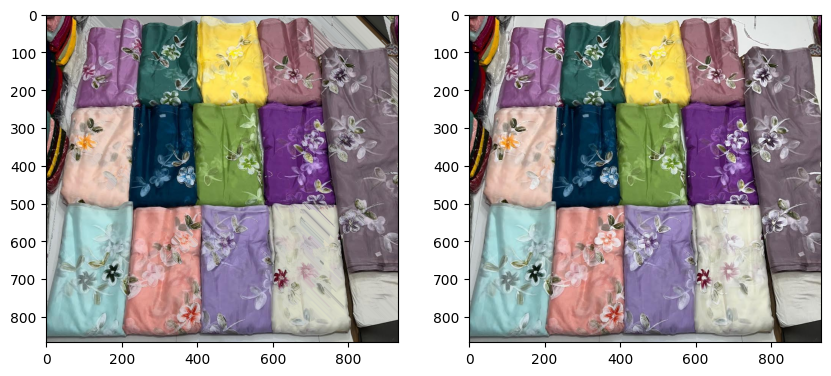

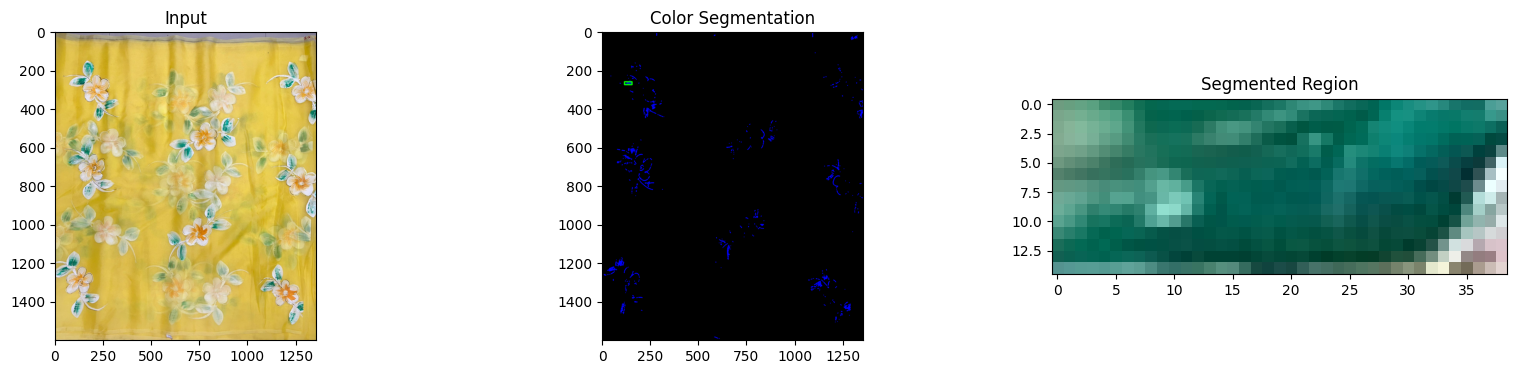

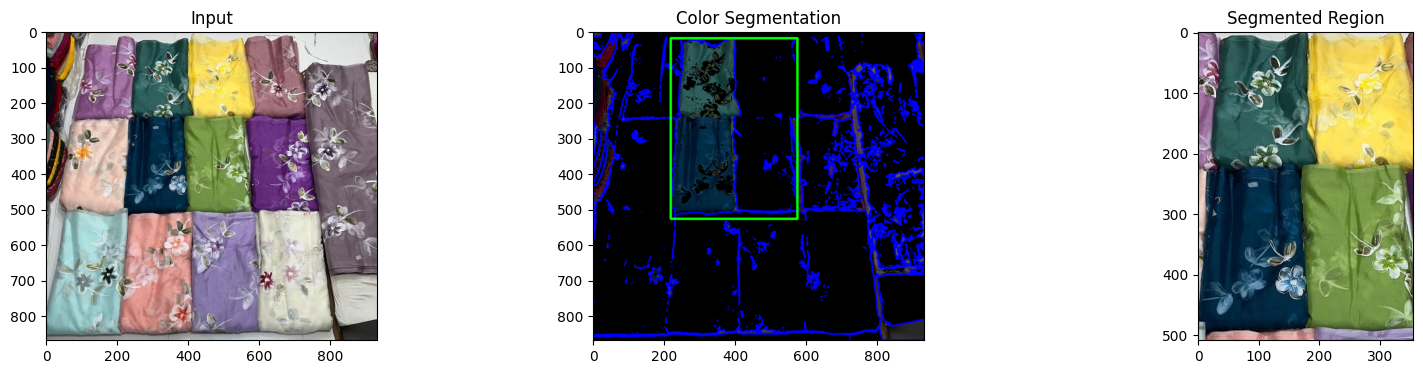

In [50]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("Image/0.jpg")
img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
backup= img.copy()
for i in range(len(img[:,0,0])):
    for j in range(len(img[0,:,0])):
        R =int(img[i,j,0])
        G =int(img[i,j,1])
        B =int(img[i,j,2])

        sum_col = R+G+B

        if (sum_col >180) & (R>200) & (G>200) & (B>200):
            img[i,j,0] = img[i-1,j-1,0]
            img[i,j,1] = img[i-1,j-1,1]
            img[i,j,2] = img[i-1,j-1,2]

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.subplot(1, 2, 2), plt.imshow(backup)
plt.show()

for i in os.listdir('Image'):
    image = cv2.imread("Image/" + i)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define color boundaries
    lower_bound = np.array([0, 0, 0], dtype="uint8")
    upper_bound = np.array([100, 100, 100], dtype="uint8")

    # Create a mask to keep pixels within the color range
    mask = cv2.inRange(image, lower_bound, upper_bound)
    output = cv2.bitwise_and(image, image, mask=mask)

    # Threshold the mask to get binary image
    ret, thresh = cv2.threshold(mask, 40, 255, 0)

    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if len(contours) != 0:
        # Draw contours in blue
        cv2.drawContours(output, contours, -1, (0, 0, 255), 3)

        # Find the biggest contour (c) by the area
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Draw the biggest contour (c) in green
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 5)

    foreground = image[y:y+h, x:x+w]

    # Plotting the images
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 3, 1), plt.imshow(image), plt.title("Input")
    plt.subplot(1, 3, 2), plt.imshow(output), plt.title("Color Segmentation")
    plt.subplot(1, 3, 3), plt.imshow(foreground), plt.title("Segmented Region")
    plt.show()
